In [80]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.constants import mu_0
from matplotlib import cm
import math
dt = 1e-3
k = 8.988e9


In [81]:
class Vector:
    def __init__(self,x,y,z):
        self.z = z
        self.y = y
        self.x = x

    def __str__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"
    
    def __repr__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"


    def __add__(self, other):
        if not isinstance(other,Vector):
            raise ValueError("The 'other' object must be a Vector")
        test = Vector(0,0,0)
        test.x = self.x + other.x
        test.y = self.y + other.y
        test.z = self.z + other.z
        return test

    def __sub__(self, other):
        if not isinstance(other,Vector):
            raise ValueError("The 'other' object must be a Vector")
        result_x = self.x - other.x
        result_y = self.y - other.y
        result_z = self.z - other.z
        return Vector(result_x, result_y, result_z)
    
    def __mul__(self,other):
        return Vector(self.x * other, self.y * other, self.z* other)
    
    def __truediv__ (self,other):
        temp = Vector(0,0,0)
        temp.x = self.x/other
        temp.y = self.y/other
        temp.z = self.z/other
        return temp

    def dot_product(self, other):
        if not isinstance (other, Vector):
            raise ValueError("The 'other' object must be a Vector")
        test = Vector(0,0,0)
        test.x = self.x * other.x
        test.y = self.y * other.y
        test.z = self.z * other.z
        result = test.x + test.y + test.z
        return result
    

    #just check once if the cross product is good or not for lorentz force B_force
    def cross_product(a,b):
        temp = Vector(0, 0, 0)
        temp.x = a.y * b.z - a.z * b.y
        temp.y = a.z * b.x - a.x * b.z
        temp.z = a.x * b.y - a.y * b.x
        return temp
    
    def mod(self):
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)
    
    def dist(self,other):
        return math.sqrt((self.x-other.x)**2 + (self.y-other.y)**2 + (self.z-other.z)**2)

In [82]:
class Particle:
    def __init__ (self,mass,charge,mcharge,pos,vel):
        self.mass = mass
        self.charge = charge
        self.mcharge = mcharge
        self.pos = pos
        self.vel = vel
        self.trajectory_x = []
        self.trajectory_y = []
        self.trajectory_z = []
        self.trajectory_x.append(self.pos.x)
        self.trajectory_y.append(self.pos.y)
        self.trajectory_z.append(self.pos.z)
    
    def __str__ (self):
        return f"Particle \n Mass: {self.mass} \n Charge : {self.charge}\n mCharge : {self.mcharge}\n Position {self.pos}\n Velocity {self.vel}"

    def __repr__ (self):
        return f"Particle \n Mass: {self.mass} \n Charge : {self.charge} \n mCharge : {self.mcharge} \n Position {self.pos}\n Velocity {self.vel}"
    
    def update(self,tot_acc):
        self.vel += tot_acc*dt
        self.pos += self.vel*dt

    def update_trajectory(self):
        self.trajectory_x.append(self.pos.x)
        self.trajectory_y.append(self.pos.y)
        self.trajectory_z.append(self.pos.z)

# Defining various types of forces

In [83]:
def Mag (particle, E, B):
    # return Vector(0.0,0.0,0.0)
    tot_for = B*particle.mcharge
    tot_acc = tot_for/particle.mass
    return tot_acc

def Lorentz (particle, E, B):
    # return Vector(0.0,0.0,0.0)
    E_force = E
    B_force = particle.vel.cross_product(B)
    tot_for = (E_force + B_force)
    tot_acc = tot_for*(particle.charge/particle.mass)
    return tot_acc

def Coulumb_q(par1,par2):
    # return Vector(0.0,0.0,0.0)
    r = par1.pos.dist(par2.pos)
    if (r == 0):
        print("They meet at:\nParticle 1",par1.pos,"\nParticle 2",par2.pos)
        return Vector(0.0,0.0,0.0)
    force = k * abs(par1.charge * par2.charge) / (r ** 3)
    # print(force)
    r_vec =par1.pos - par2.pos
    f_vec = r_vec*force
    return f_vec

def Coulumb_m(par1,par2):
    # return Vector(0.0,0.0,0.0)
    r = par1.pos.dist(par2.pos)
    if (r == 0):
        print("They meet at:\nParticle 1",par1.pos,"\nParticle 2",par2.pos)
        return Vector(0.0,0.0,0.0)
    const = 1/(4*math.pi*mu_0)
    force = const * abs(par1.mcharge * par2.mcharge) / (r ** 3)
    r_vec = par1.pos - par2.pos
    f_vec = r_vec*force
    return f_vec

Total acceleration exclusing the particle interaction

In [84]:
def tot_acc(par1,E,B):
   tot_acc = Lorentz(par1,E,B)+Mag(par1,E,B)
   # tot_acc = Mag(par1,E,B)
   return tot_acc

Particle Interaction 

In [85]:
def Interaction_Force (particle, N_Particles,i):
    #Columbic Force
    vec_q = Vector(0.0,0.0,0.0)
    vec_b = Vector(0.0,0.0,0.0)
    for idx,par in enumerate(N_Particles):
        if idx == i:
            continue
        vec_q = vec_q + Coulumb_q(particle,par)/particle.mass
        vec_b = vec_b + Coulumb_m(particle,par)/particle.mass

    # print(vec_b)
    acc_tot = vec_b+vec_q 
    return acc_tot

# N Particle

Fields

In [86]:
E = Vector(0.0, 0.0 ,1.0)
B = Vector(0.0 ,0.0 ,1.0)
# We can try the other method where we define electric and magnetic field as an list of Vectors storing the E,B at different time and positions
# like def Electic_field (x,y,z,t)

In [87]:
N = 2
N_Particles = []
N_acc = []
veloc = [Vector(0.0,0.0,0.0),Vector(0.0,0.0,0.0),Vector(0.0,0.0,0.0)]
posit = [Vector(10.0,0.0,0.0),Vector(0.0,10.0,0.0),Vector(0.0,0.0,10.0)]
for i in range(N):
    mass = 2e-4
    charge = 2e-6
    mcharge = 1e-4
    pos = posit[i]
    vel = veloc[i]
    par_temp = Particle(mass,charge,mcharge,pos,vel)
    N_Particles.append(par_temp)

In [88]:
# for idx, par in enumerate(N_Particles):
#     print(f"Particle {idx + 1}:\n{par}\n")

In [89]:
for par in N_Particles:
    temp = tot_acc(par,E,B)
    N_acc.append(temp)

print(N_acc)

[Vector(0.0, 0.0, 0.51), Vector(0.0, 0.0, 0.51)]


In [90]:
total_time = 40
t = (int)(total_time/dt)
flag = 0
# ps = Vector(0.0,0.0,0.0)
for _ in range(t):
    temp_x = []
    temp_y = []
    temp_z = []
    for idx, par in enumerate(N_Particles):
        # N_acc[idx] = N_acc[idx] + Interaction_Force(par,N_Particles,idx)
        par.update(N_acc[idx])
        par.update_trajectory()
        N_acc[idx] = tot_acc(par,E,B) + Interaction_Force(par,N_Particles,idx)

    #Function to check if any of them are near to each other


# Plotting Particles

/tmp/ipykernel_13972/3587970597.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', len(N_Particles))
/tmp/ipykernel_13972/3587970597.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(last_x_pos,last_y_pos,last_z_pos, c=color,marker = 'o',s = 100)


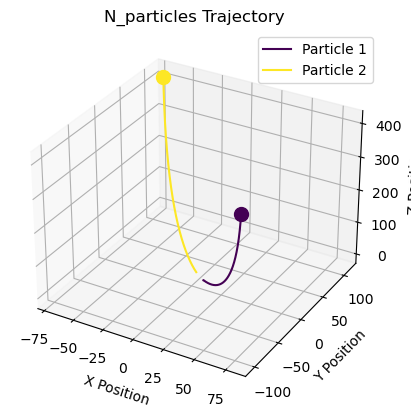

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colormap = cm.get_cmap('viridis', len(N_Particles))


for idx, par in enumerate(N_Particles):
    color = colormap(idx / len(N_Particles))
    ax.plot(par.trajectory_x ,par.trajectory_y ,par.trajectory_z, color = color, label= f'Particle {idx + 1}')
    last_x_pos = par.trajectory_x[-1]
    last_y_pos = par.trajectory_y[-1]
    last_z_pos = par.trajectory_z[-1]
    ax.scatter(last_x_pos,last_y_pos,last_z_pos, c=color,marker = 'o',s = 100)

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('N_particles Trajectory')

# ax.view_init(elev=270, azim=0)
ax.legend()
plt.show()